In [4]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [6]:
X_train.shape
#training samples are 50 thousand
#32,32 image pixcels
#3 is for rgb channels

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
X_train[0]
#This is the 3Dimensional array
#59,62 are image picels
#63 is the rgb channels

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

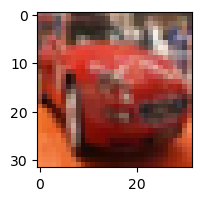

In [9]:
#check the images 
plt.figure(figsize = (2,3))
plt.imshow(X_train[5])

In [10]:
#check y_train data
y_train[:4]
#this is 1Dimensional array.we can't access the index.we can do the reshape

array([[6],
       [9],
       [9],
       [4]], dtype=uint8)

In [11]:
#reshape the y_train.Because we can access the index
y_train = y_train.reshape(-1)
y_train[:4]
#Here we can access the index
#the y_train values are airplane,automobiles,bird,cat,deer,dog,frog,horse,ship,truck

array([6, 9, 9, 4], dtype=uint8)

In [12]:
classes = ["airplane","automobiles","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
classes[9]

'truck'

In [14]:
def plotimage(x,y,index):
    plt.figure(figsize = (2,3))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

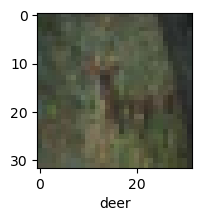

In [15]:
plotimage(X_train,y_train,10)

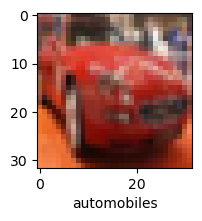

In [16]:
plotimage(X_train,y_train,5)

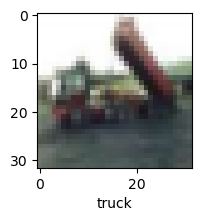

In [17]:
plotimage(X_train,y_train,2)

In [18]:
#we can do the normalization
X_train = X_train / 255
y_train = y_train / 255

In [19]:
X_train[5]

array([[[0.62352941, 0.4       , 0.39607843],
        [0.58823529, 0.35686275, 0.37254902],
        [0.6       , 0.37254902, 0.38039216],
        ...,
        [0.35686275, 0.27843137, 0.21960784],
        [0.29019608, 0.24705882, 0.21568627],
        [0.29803922, 0.22745098, 0.21568627]],

       [[0.55686275, 0.29411765, 0.26666667],
        [0.57254902, 0.28235294, 0.25882353],
        [0.60784314, 0.29803922, 0.25490196],
        ...,
        [0.49803922, 0.41176471, 0.27843137],
        [0.47843137, 0.43529412, 0.36470588],
        [0.3372549 , 0.27058824, 0.23921569]],

       [[0.42745098, 0.2627451 , 0.29411765],
        [0.38823529, 0.22745098, 0.23529412],
        [0.41176471, 0.23137255, 0.20392157],
        ...,
        [0.5372549 , 0.43921569, 0.31372549],
        [0.63921569, 0.51764706, 0.41176471],
        [0.36470588, 0.28235294, 0.27843137]],

       ...,

       [[0.95686275, 0.50588235, 0.2745098 ],
        [0.94117647, 0.48235294, 0.25490196],
        [0.94509804, 0

In [21]:
y_train.shape

(50000,)

In [ ]:
#we can build the ANN --->Frist
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000,activation = 'relu'),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10,activation = 'sigmoid')
])

In [ ]:
ann.compile(optimizer = 'SGD',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
ann.fit(X_train,y_train,epochs = 5)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
y_pred = ann.predict(X_test)

In [ ]:
y_pred_classes = [np.argmax(element) for element in y_pred]

In [ ]:
print(confusion_matrix(y_test,y_pred_classes))

In [ ]:
print(classification_report(y_test,y_pred_classes))

In [ ]:
#Here the accurancy is vary low that's way ANN is not suitable we can used the CNN

cnn = models.Sequential([
    #CNN
    layers.Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense layer
    layers. Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

In [ ]:
cnn.compile(optimizer = 'SGD',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs = 10)

In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
#before we can see the image based on the index we can see y_test is which dimensional array or array state
y_test[:3]

In [ ]:
#it is in array formate.sappose it is in one dimensional array we can do the reshape
def plotimage(x,y,index):
    plt.figure(figsize = (2,3))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

In [ ]:
plotimage(X_train,y_train,5)

In [ ]:
#predict the x_test
y_pred = cnn.predict(X_test)

In [ ]:
y_pred[:5]

In [ ]:
y_pred_class = [np.argmax(element) for element in y_pred]
y_pred_class[:4]

In [ ]:
y_test[:5]

In [ ]:
plotimage(X_train,y_train,5)